## Najprostszy model uczenia maszynowego - model regresji liniowej

In [1]:
import sklearn

X1, X2,...,Xn - zmienne niezależne (dane do modelu)

Y - zmienna docelowa

Ytrue - wartość rzeczywista

ypred- wartość przewidziana przez model

w0,w1,...,wn - wagi do modelu.  

W modelu tym zakłada się, że wartość przewidywana może być liniową kombinacją zmiennych niezależnych.

Wzór modelu:

Ypred(W,X) = w0 + w1X1+...+wnXn

Y = XW

Wprowadzamy sobie oznaczenia:

w = (w1,w2...) jako coef_
w0 jako intercept_

Regresja liniowa polega na takim dopasowaniu wag w0,w1....wn, by zminimalizować funkcję kosztu (cost function):


Przykład w R^2:

Y = w0 + w1X1

Przykład w R^3:

Y = w0 + w1X1 + w2X2


##Podstawowe założenia regresji liniowej:



*   mamy zależność liniową
*   wariancja reszt jest taka sama dla wszystkich obserwacji
*   brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

###Generowanie danych:

Przykład w R^2:

Y = w0 + w1X1





In [2]:
import numpy as np
X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1,1)

print('Rozmiar X:', X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


## Podział danych na zbiór treningowy i testowy

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


## Wizualizacja

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


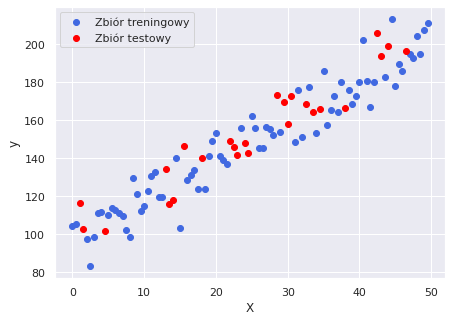

In [7]:

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, color='royalblue', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='red', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Regresja liniowa

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.0677816]
97.37833564286021


Czyli rozwiązaniem jest prosta o wzorze Y = 97.38 + 2.07x1

Wizualizacja zbioru treningowego i dopasowanego modelu

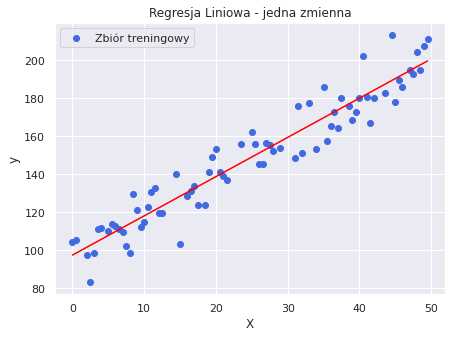

In [17]:
plt.figure(figsize=(7,5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='royalblue', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#jest to tak zwana metoda najmniejszych kwadratów, stara się redukować odległość błędów.

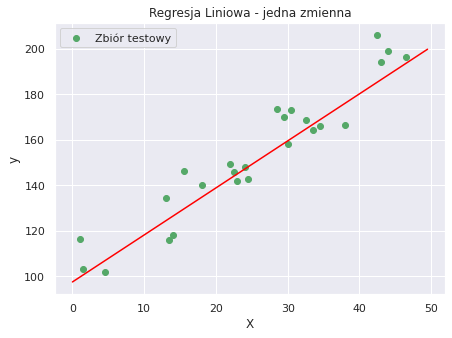

In [18]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7,5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Ocena modelu

In [19]:
lin_reg.score(X_test, y_test)

0.8880284809678249

In [20]:
lin_reg.score?

# przykład ZŁEGO zastosowania regresji liniowej

[-0.09022631]
22.31500334924966


Text(0, 0.5, 'y')

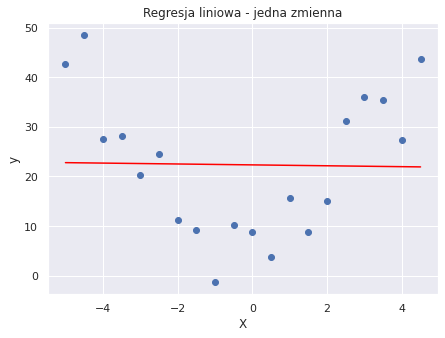

In [22]:
X = np.arange(-5,5,0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')